# EfficientGAN mnist全ての画像を使った実験
5 を通常データとし、４を異常データとした。  
train_images : 6000枚  
num_epochs : 300  
test_images : 300  
 
 判定時間 0:00:00.510439  
早すぎわろ 
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

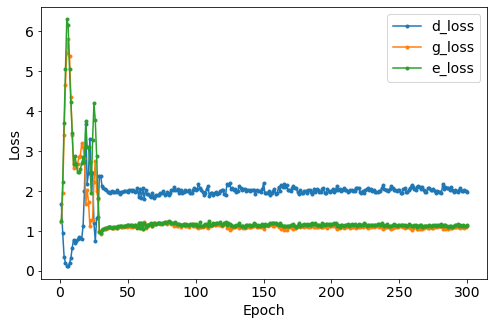

In [19]:
loss = pd.read_csv('EFGAN_train_loss.csv', index_col=0)

fig = plt.figure(figsize=(8, 5))
for col in loss.columns[1:]:
    plt.plot(loss['epoch'], loss[col], '.-', label=col)

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

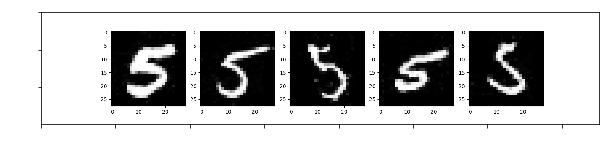

In [14]:
img_path = '200th_epoch_generated_figure.png'
img = plt.imread(img_path)

fig = plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.xticks(color="None")
plt.yticks(color="None")
plt.show()

In [2]:
true_loss = np.load('true_loss.npy')
annomaly_loss= np.load('annomaly_loss.npy')

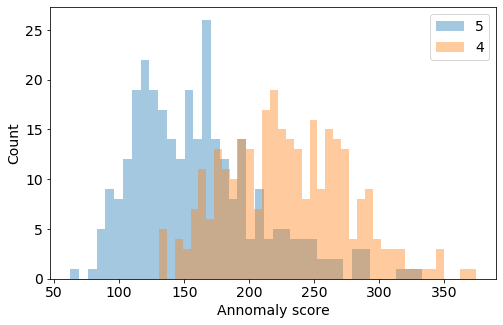

In [3]:
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(8, 5))

sns.distplot(true_loss, kde=False, bins=40, label='5')
sns.distplot(annomaly_loss, kde=False, bins=40, label='4')

plt.legend()
plt.xlabel('Annomaly score')
plt.ylabel('Count')
plt.show()

In [20]:
df = pd.DataFrame({'true' : true_loss,
                             'annomaly' : annomaly_loss})
threshold = [50*i for i in range(200)]

ROC = dict()
ROC['threshold'] = []
ROC['FPR'] = []
ROC['TPR'] = []

Precision_Recall = dict()
Precision_Recall['threshold'] = []
Precision_Recall['Precision'] = []
Precision_Recall['Recall'] = []

for th in threshold:
    # 異常データとして判定されたデータの数をまとめる
    ano_count = (df>th).sum(axis=0)
    TP = len(df) - ano_count['true']
    FP = len(df) - ano_count['annomaly']
    TN = ano_count['annomaly']
    FN = ano_count['true']
    
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    
    Precision = TP / (TP + FP )
    Recall = TP/(TP + FN)
    
    ROC['threshold'].append(th)
    ROC['FPR'].append(FPR)
    ROC['TPR'].append(TPR)

    Precision_Recall['threshold'].append(th)
    Precision_Recall['Precision'].append(Precision)
    Precision_Recall['Recall'].append(Recall)
    
ROC = pd.DataFrame(ROC)
Precision_Recall = pd.DataFrame(Precision_Recall)

/home/nagae/.conda/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars


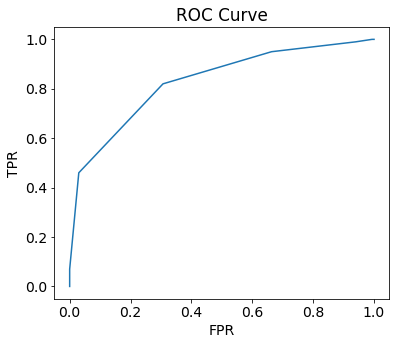

In [21]:
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(6, 5))
plt.plot(ROC['FPR'], ROC['TPR'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

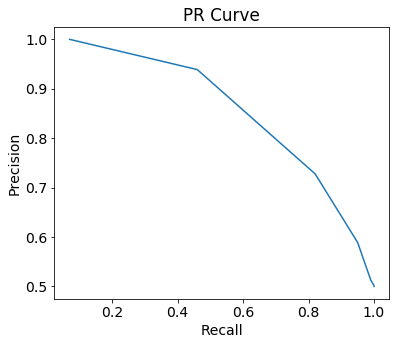

In [7]:
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(6, 5))
Precision_Recalle = Precision_Recall.dropna()
plt.plot(Precision_Recall['Recall'], Precision_Recall['Precision'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.show()